# Разведочный анализ данных (EDA)

Анализ распределения IC50, CC50, SI и корреляций между ними.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных
df = pd.read_excel("Данные_для_курсовои_Классическое_МО.xlsx")

# Очистка данных
df.drop(columns=["Unnamed: 0"], inplace=True)
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=constant_cols, inplace=True)
df.dropna(inplace=True)
df.describe()


,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,...,998.00000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,221.118757,586.668414,72.650005,10.829292,10.829292,0.180888,-0.966330,0.581179,29.539854,348.525023,...,0.05511,0.053106,0.012024,0.009018,0.001002,0.001002,0.052104,0.070140,0.205411,0.007014
std,400.510657,642.016454,685.504279,3.312200,3.312200,0.168860,1.590258,0.212081,12.726557,127.045802,...,0.30372,0.257652,0.109048,0.094582,0.031654,0.031654,0.222349,0.255511,1.217101,0.083497
min,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,110.156000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.491340,99.999036,1.457233,9.050397,9.050397,0.051003,-1.332714,0.442842,18.533333,264.321000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.992006,408.793314,3.856410,12.187546,12.187546,0.124656,-0.419485,0.635772,29.374328,315.457000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,224.408630,891.770961,16.525000,13.172207,13.172207,0.291678,0.065482,0.742483,38.801136,409.435250,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,904.777000,...,4.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000


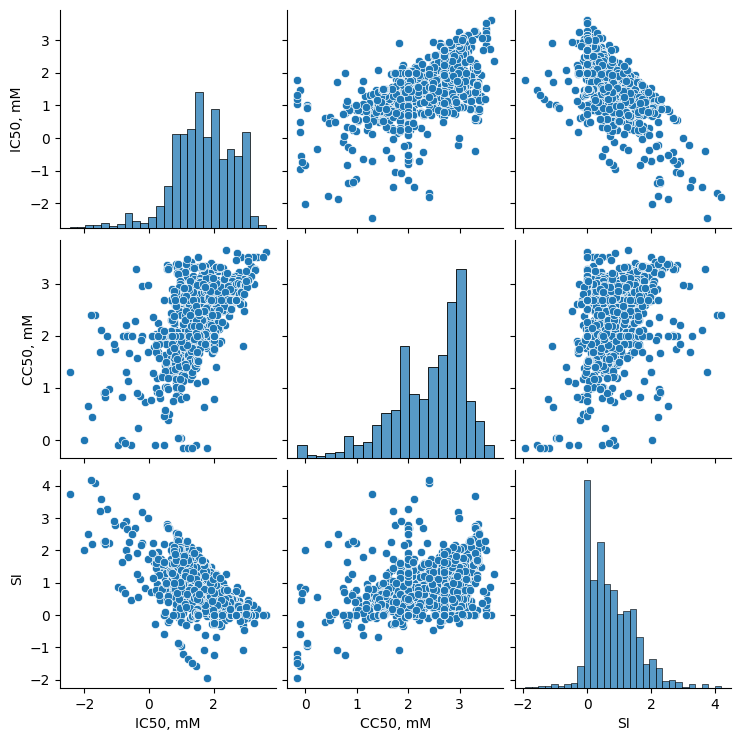

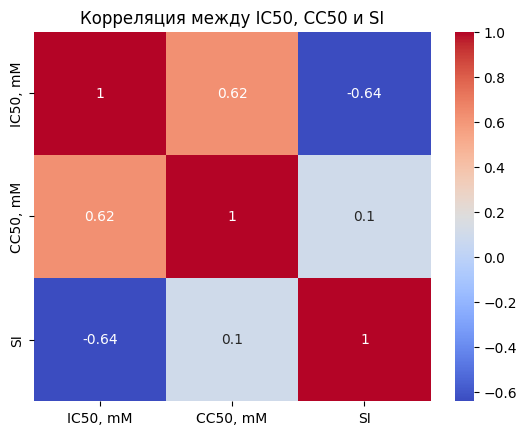

In [5]:
# Визуализация 
target_cols = ["IC50, mM", "CC50, mM", "SI"]
log_df = df[target_cols].apply(lambda x: np.log10(x + 1e-6))
sns.pairplot(log_df)
plt.show()

# Корреляционная матрица
corr = df[target_cols].corr(method='spearman')
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Корреляция между IC50, CC50 и SI")
plt.show()


# Разведочный анализ данных (EDA)

В этом разделе выполняются следующие шаги:

1. **Загрузка и очистка данных**  
   - Считываем Excel-файл `Данные_для_курсовои_Классическое_МО.xlsx`.  
   - Удаляем служебную колонку `Unnamed: 0`.  
   - Идентифицируем и удаляем признаки, не содержащие разнообразия (константные столбцы).  
   - Удаляем все строки с пропусками, оставляя только полные записи.  
   - Формируем список признаков `features`, исключая целевые переменные **IC50**, **CC50** и **SI**.

2. **Базовый статистический обзор**  
   - Выводим `.describe()` для обзора диапазонов, средних, медиан и квартилей по всем признакам и целям.  
   - Особое внимание уделяем распределениям **IC50**, **CC50**, **SI** — они имеют сильную правостороннюю асимметрию.

3. **Логарифмическое преобразование и визуализация**  
   - Преобразуем целевые переменные и/или признаки через `log10` для более удобной визуализации разброса в нескольких порядках величины.  
   - Строим `pairplot` (Seaborn) для наглядного анализа попарных распределений и выявления зависимостей.

4. **Корреляционный анализ**  
   - Рассчитываем матрицу корреляций (Spearman) между **IC50**, **CC50** и **SI**.  
   - Визуализируем тепловую карту (`heatmap`), чтобы определить степень взаимосвязи и потенциальную мультиколлинеарность.

5. **Ключевые выводы EDA**  
   - **IC50 и CC50** демонстрируют умеренную положительную корреляцию (ρ ≈ 0.62).  
   - **SI** (CC50/IC50) зеркально коррелирует с IC50 (ρ ≈ –0.64) и положительно — с CC50.  
   - Ни один химический дескриптор не имеет сильной (|ρ| > 0.3) корреляции с целевыми переменными, что указывает на необходимость использования сложных моделей.  
   - Логарифмическое отображение подчеркивает кластеры “высокоактивных” (низкий IC50) и “низкотоксичных” (высокий CC50) соединений.

> **Вывод:** данные требуют предварительной обработки, удаления нерелевантных признаков и работы с нелинейными зависимостями — к чему мы приступим в следующих разделах с построением регрессионных и классификационных моделей.
